function approximation with keras
---

In [12]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


pi = np.pi

%matplotlib inline
plt.style.use('dark_background')

In [24]:
class feed_forward_continuous(keras.models.Sequential):
    def __init__(self, num_inputs, num_hidden, num_outputs, hidden_size = 128):
        super().__init__()
        self.add(tf.keras.layers.Dense(num_inputs, activation = 'relu', kernel_initializer='he_normal'))
        for layer in range(num_hidden):
            self.add(tf.keras.layers.Dense(hidden_size, activation = 'relu', kernel_initializer='he_normal'))
        self.add(tf.keras.layers.Dense(num_outputs, activation = 'sigmoid'))
        self.compile(optimizer = 'adam', loss = 'mse')


In [25]:
test_model = feed_forward_continuous(1,2,1)
test_model.trainable_variables

[]

# Approximate Sine

In [29]:
#make rng
seed=2023
rng = np.random.default_rng(seed)
input_width = 2*pi
input_center = pi

epoch_losses = 0.
num_epochs = 100
batch_size = 128

epoch_print_period = 5

sin_model = feed_forward_continuous(1, 1, 1,16)

#training loop
approx_this_function = tf.math.sin
loss_fn = tf.losses.mean_squared_error
optimizer = tf.optimizers.Adam(learning_rate=.005)
history = []
loss_history = []
for epoch in range(num_epochs):
    optimizer.learning_rate = optimizer.learning_rate*0.9999
    if epoch%epoch_print_period==0:
        print(f'Epoch {epoch}')
    batch_Xes = []
    batch_preds = []
    batch_y = []
    losses = []
    with tf.GradientTape() as tape:
        for batch_guy in range(batch_size):
            x = input_width*(rng.random()-0.5) + input_center
            batch_Xes.append(x)
            pred = sin_model.call(tf.convert_to_tensor([[x]]))
            y = approx_this_function(x)
            batch_preds.append(pred)
            batch_y.append(y)
            losses.append(loss_fn(pred,y))
        loss = tf.reduce_mean(losses)
        grads = tape.gradient(loss, sin_model.trainable_variables)
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, sin_model.trainable_variables))
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    history.append([batch_Xes, batch_preds, batch_y])
    loss_history.append(loss)

Epoch 0
Epoch 5
Epoch 10
Epoch 15
Epoch 20
Epoch 25
Epoch 30
Epoch 35
Epoch 40
Epoch 45
Epoch 50
Epoch 55
Epoch 60
Epoch 65
Epoch 70
Epoch 75
Epoch 80
Epoch 85
Epoch 90
Epoch 95


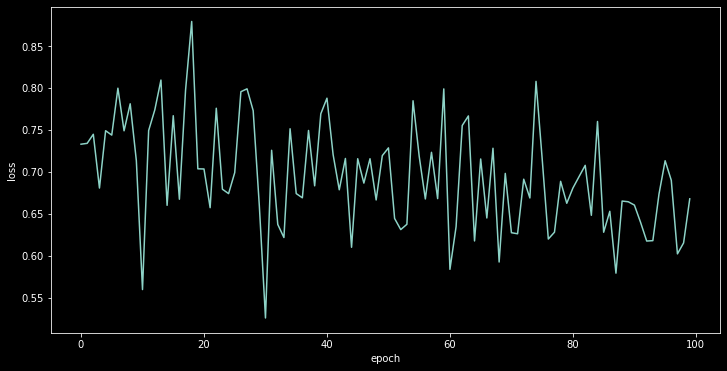

In [30]:
figsize = (12,6)
plt.figure(figsize = figsize)
plt.plot(loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

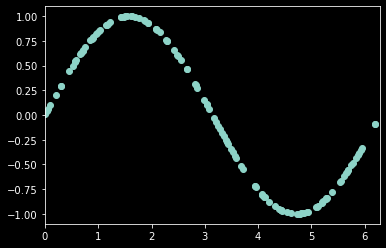

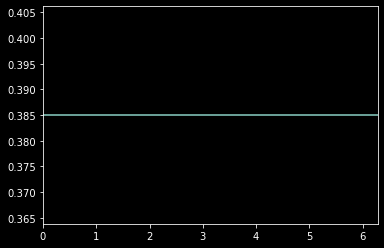

In [31]:
plt.scatter(batch_Xes, batch_y)
plt.xlim(0,2*pi)
plt.show()
y = sin_model.predict(np.linspace(0, 2*pi, 50))
plt.xlim(0,2*pi)
plt.plot(y)
plt.show()

In [32]:
grads

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1, 16), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 <tf.Tensor: shape=(16,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Tensor: shape=(16, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.18846618], dtype=float32)>]

In [33]:

optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0049502384>

In [419]:
#make rng
seed=2022
rng = np.random.default_rng(seed)
pi = np.pi
input_width = 4*pi
input_center = 2*pi

epoch_losses = 0.
num_epochs = 640
batch_size = 256

sin_model = feed_forward_continuous(1, 1, 1, 128)

#training loop
approx_this_function = tf.math.sin
loss_fn = tf.losses.mean_squared_error
optimizer = tf.optimizers.Adam(learning_rate=.05)
history = []
loss_history = []
for epoch in range(num_epochs):
    optimizer.learning_rate = optimizer.learning_rate*0.9
    if epoch%100==0:
        print(f'Epoch {epoch}')
    batch_Xes = []
    batch_preds = []
    batch_y = []
    losses = []
    with tf.GradientTape() as tape:
        x = input_width*(rng.random(batch_size)-0.5) + input_center
        pred = sin_model.predict(tf.convert_to_tensor([x]))
        y = [ approx_this_function(value) for value in x ]
        losses.append(loss_fn(pred,y))
        loss = tf.reduce_mean(losses)
        grads = tape.gradient(loss, sin_model.trainable_variables)
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, sin_model.trainable_variables))
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    history.append([batch_Xes, batch_preds, batch_y])
    loss_history.append(loss)

Epoch 0


LookupError: No gradient defined for operation'IteratorGetNext' (op type: IteratorGetNext). In general every operation must have an associated `@tf.RegisterGradient` for correct autodiff, which this op is lacking. If you want to pretend this operation is a constant in your program, you may insert `tf.stop_gradient`. This can be useful to silence the error in cases where you know gradients are not needed, e.g. the forward pass of tf.custom_gradient. Please see more details in https://www.tensorflow.org/api_docs/python/tf/custom_gradient.